# **Assignment 2**

Siddharth Nimbalkar **202211057**

## **Installing packages**

In [2]:
install.packages(c("ggplot2", "tidyr", "treemap", "ggdendro", "dplyr", "viridis"), repos = "http://cran.us.r-project.org")
#Siddharth Nimbalkar (2022211057)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridBase’, ‘igraph’, ‘gridExtra’




In [3]:
library(ggplot2)
library(tidyr)
library(treemap)
library(ggdendro)
library(dplyr)
library(viridis)
#Siddharth Nimbalkar (202211057)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



## **Reading Dataset**

In [18]:
data <- read.csv("/content/f8cd85a1-f9b8-4ff1-b195-9f75c10eb338.csv")
#Siddharth Nimbalkar (202211057)

In [19]:
msme_data <- read.csv("/content/f8cd85a1-f9b8-4ff1-b195-9f75c10eb338.csv")
#Siddharth Nimbalkar (202211057)

## **Creating DataFrame and preparing data for Visualization**

In [20]:
msme_data <- data.frame(
  state_name = rep(c("ANDHRA PRADESH", "TELANGANA", "KARNATAKA"), each = 3),
  state_id = rep(c(28, 36, 29), each = 3),
  district_name = c("GUNTUR", "Palnadu", "KRISHNA", "HYDERABAD", "WARANGAL", "KARIMNAGAR", "BANGALORE", "MYSORE", "MANGALORE"),
  lg_dt_code = c(506, 751, 507, 500, 502, 505, 560, 570, 575),
  medium = c(292, 4, 150, 400, 50, 30, 500, 70, 20),
  micro = c(90845, 34643, 50000, 120000, 45000, 38000, 150000, 60000, 30000),
  small = c(2986, 291, 1500, 5000, 800, 600, 10000, 2000, 500),
  total = c(94123, 34938, 51650, 125400, 45850, 38630, 160500, 62070, 30520)
)

# Data preparation - add a total_enterprises column and create long-format data
msme_long <- msme_data %>%
  pivot_longer(cols = c(medium, micro, small),
               names_to = "enterprise_size",
               values_to = "count")

# Factor the enterprise size for better ordering in plots
msme_long$enterprise_size <- factor(msme_long$enterprise_size,
                                   levels = c("micro", "small", "medium"))

## **Utilizing Different charts to present Stats of Dataset**


1.   Line Chart
2.   Bar Chart
3.   Pie Chart
4.   Histogram
5.   Bubble Chart
6.   Box Plot
7.   Tree Map
8.   Dendogram
9.   Scatter Plot
10.  Heat Map
11. Stacked Bar Chart

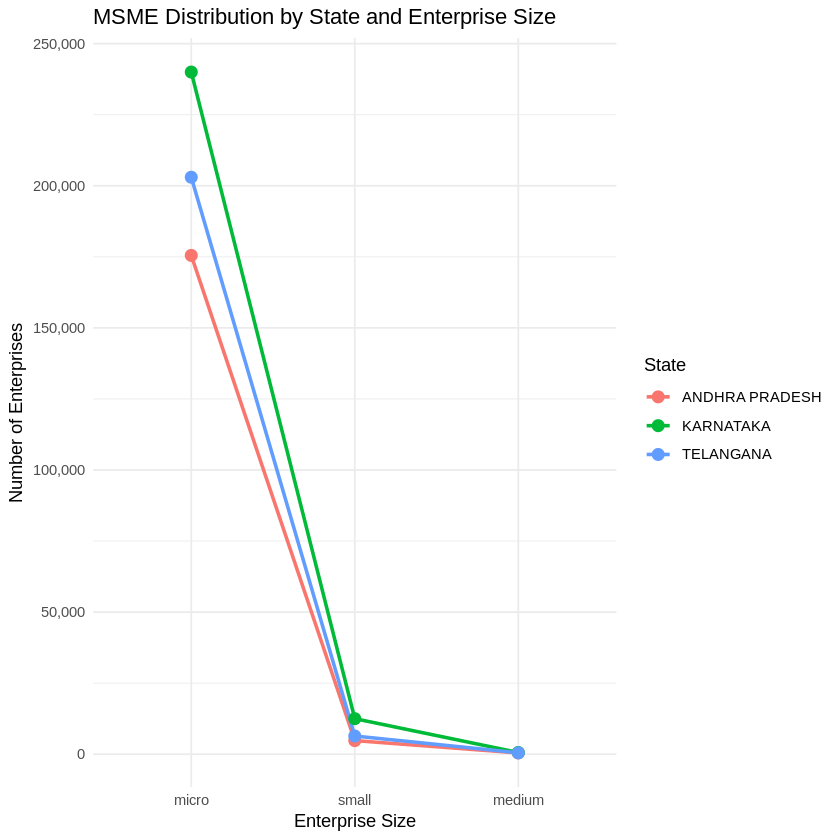

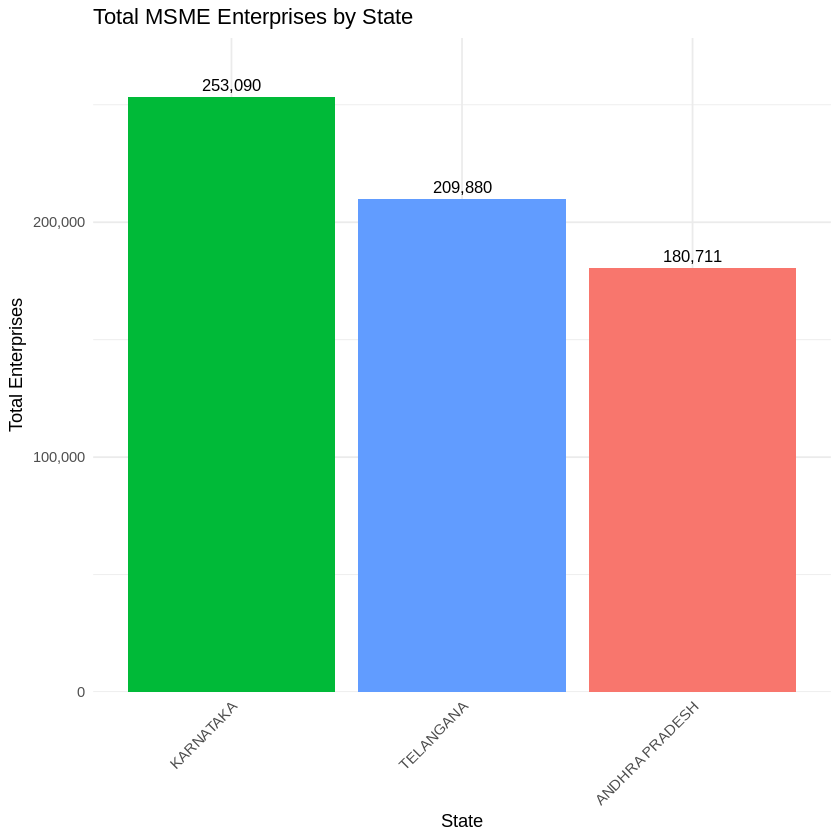

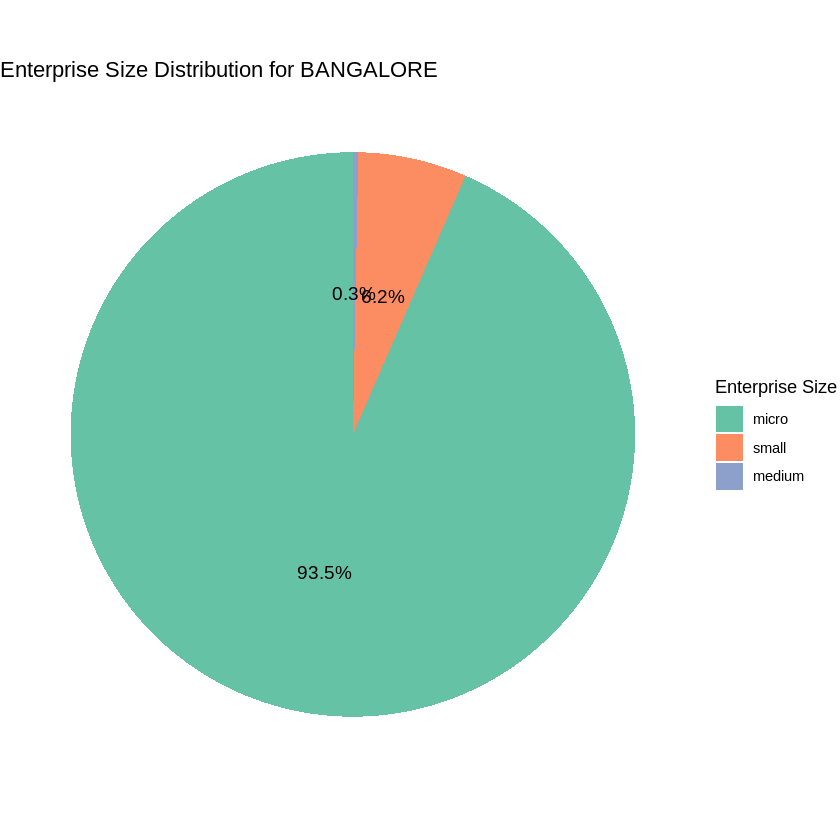

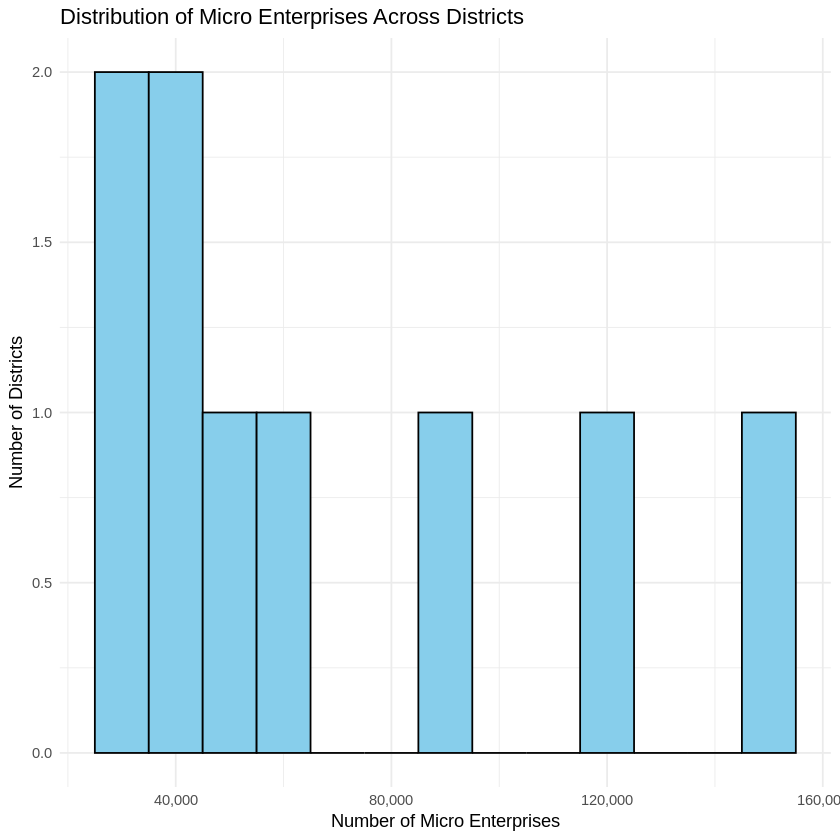

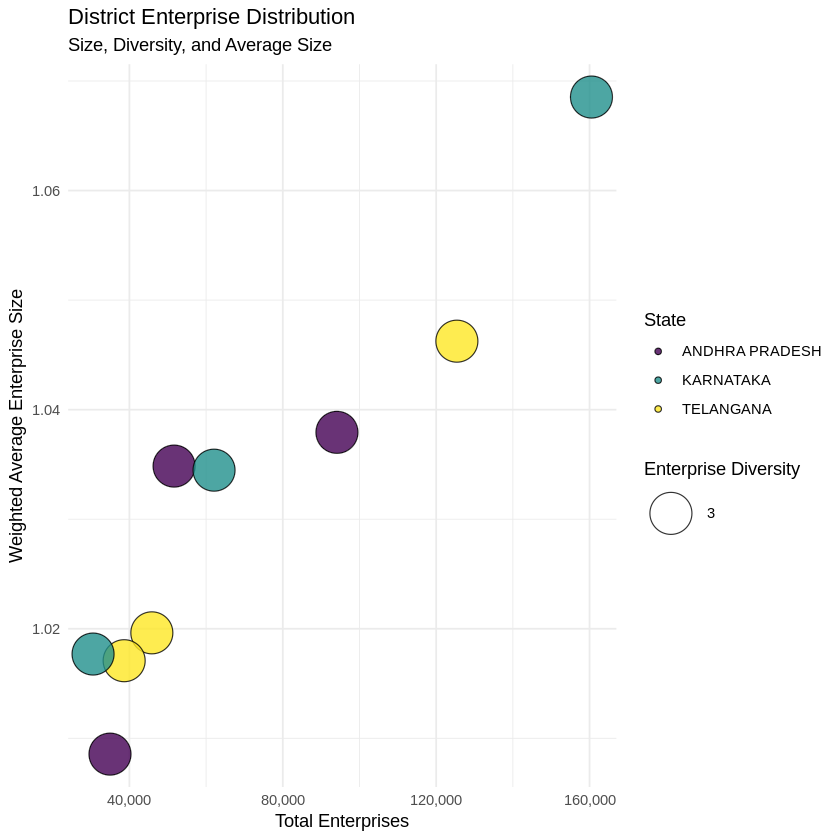

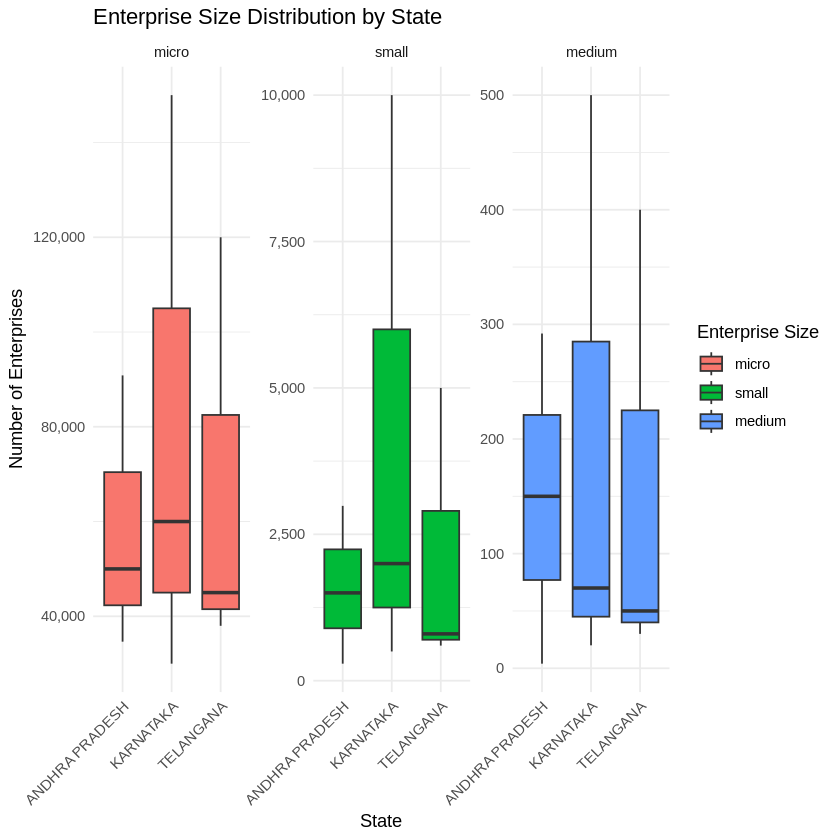

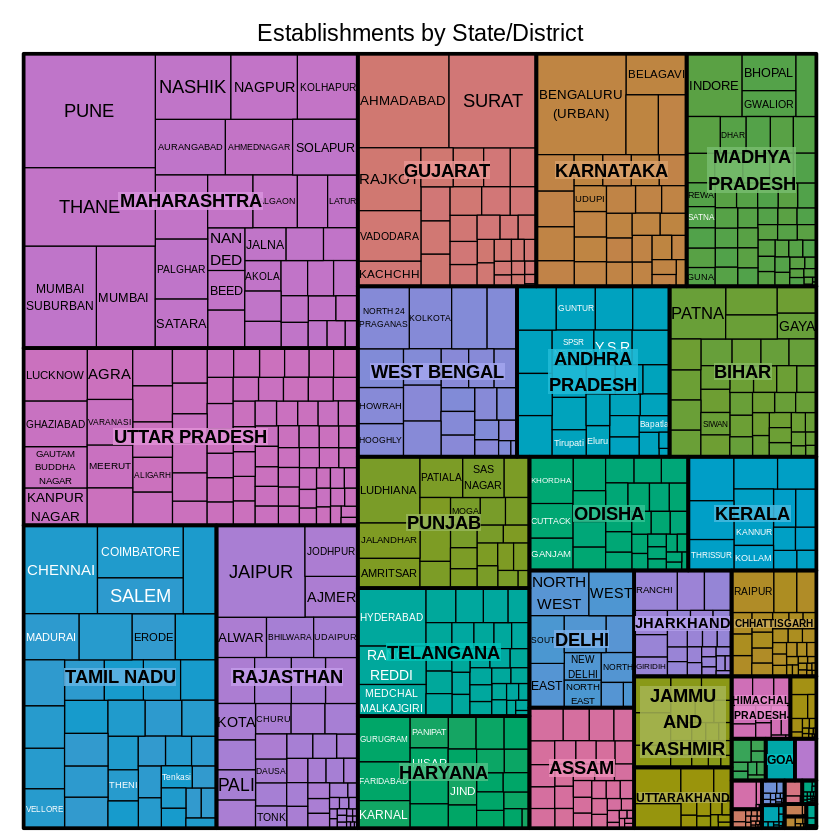

`geom_smooth()` using formula = 'y ~ x'


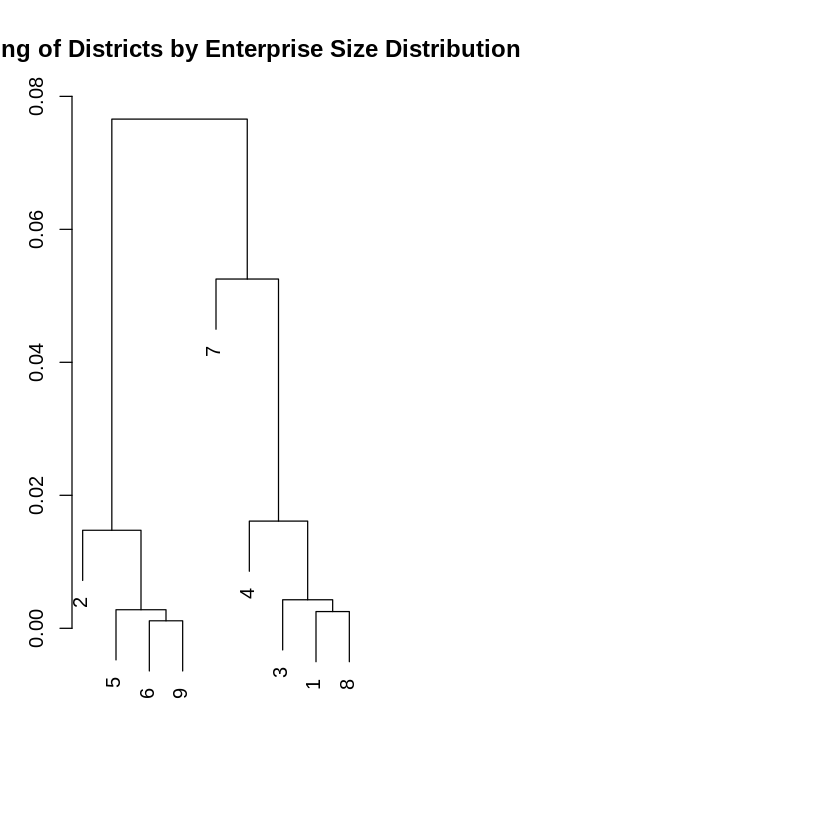

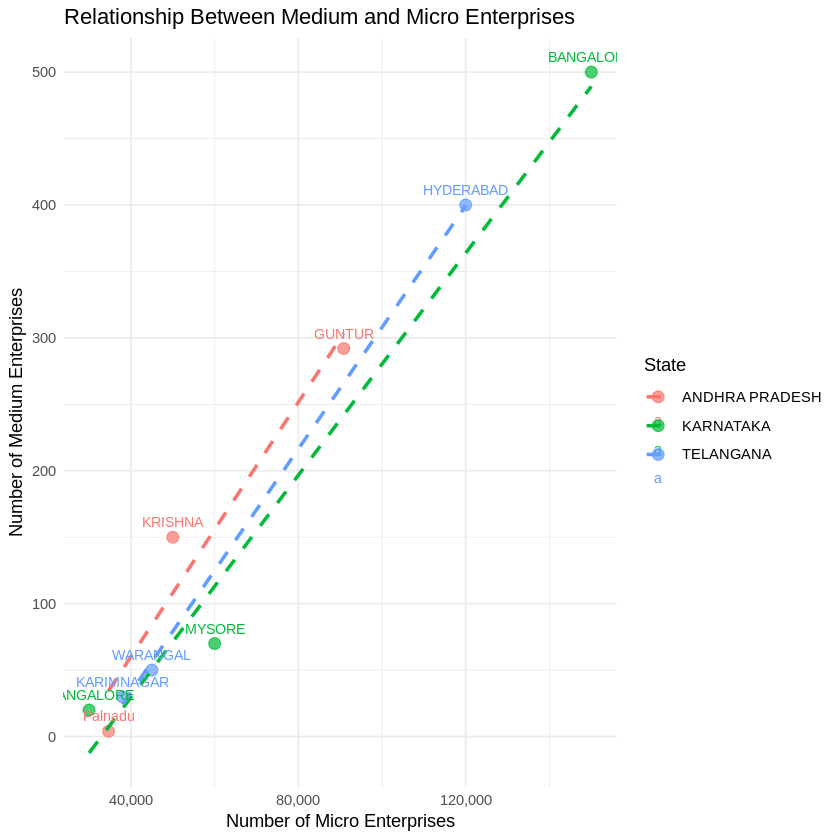

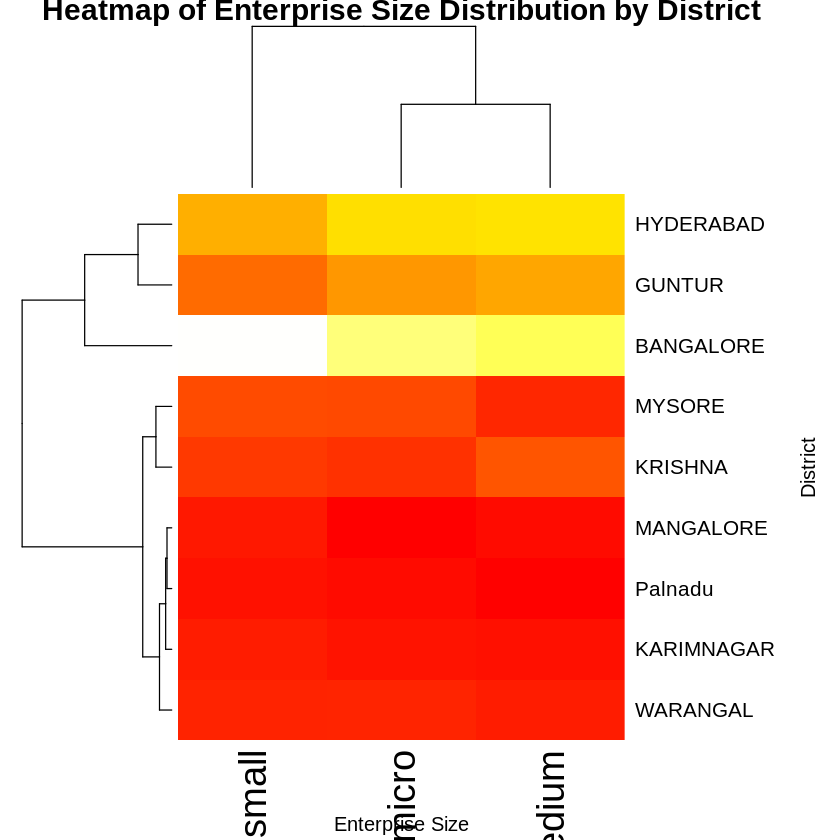

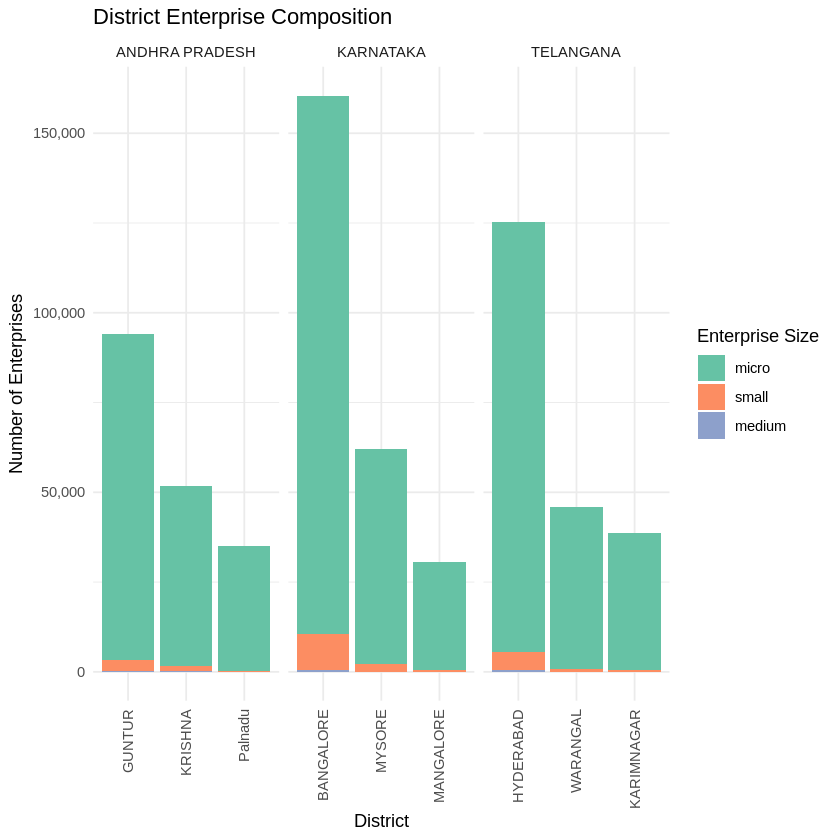

In [21]:
# 1. Line Chart: MSME Distribution by State
state_summary <- msme_long %>%
  group_by(state_name, enterprise_size) %>%
  summarize(total_count = sum(count), .groups = 'drop')

ggplot(state_summary, aes(x = enterprise_size, y = total_count, group = state_name, color = state_name)) +
  geom_line(linewidth = 1) +
  geom_point(size = 3) +
  labs(title = 'MSME Distribution by State and Enterprise Size',
       x = 'Enterprise Size',
       y = 'Number of Enterprises',
       color = 'State') +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal() +
  theme(legend.position = "right")

# 2. Bar Chart: Total Enterprises by State
state_totals <- msme_data %>%
  group_by(state_name) %>%
  summarize(total_enterprises = sum(total))

ggplot(state_totals, aes(x = reorder(state_name, -total_enterprises), y = total_enterprises, fill = state_name)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = scales::comma(total_enterprises)), vjust = -0.5, size = 3.5) +
  labs(title = 'Total MSME Enterprises by State',
       x = 'State',
       y = 'Total Enterprises') +
  scale_y_continuous(labels = scales::comma, expand = expansion(mult = c(0, 0.1))) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")

# 3. Pie Chart: Enterprise Size Distribution for Top District
top_district <- msme_data %>%
  slice_max(total, n = 1)

top_district_sizes <- msme_long %>%
  filter(district_name == top_district$district_name) %>%
  mutate(percentage = count / sum(count) * 100)

ggplot(top_district_sizes, aes(x = "", y = count, fill = enterprise_size)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = paste("Enterprise Size Distribution for", top_district$district_name),
       x = NULL, y = NULL, fill = "Enterprise Size") +
  scale_fill_brewer(palette = "Set2") +
  theme_void()

# 4. Histogram: Distribution of Micro Enterprises Across Districts
ggplot(msme_data, aes(x = micro)) +
  geom_histogram(binwidth = 10000, fill = 'skyblue', color = 'black') +
  labs(title = 'Distribution of Micro Enterprises Across Districts',
       x = 'Number of Micro Enterprises',
       y = 'Number of Districts') +
  scale_x_continuous(labels = scales::comma) +
  theme_minimal()

# 5. Bubble Chart: Distribution of Enterprise Sizes by District
# Create a district-level summary
district_summary <- msme_data %>%
  mutate(avg_enterprise_size = (medium * 3 + small * 2 + micro * 1) / total,
         enterprise_diversity = (medium > 0) + (small > 0) + (micro > 0))

ggplot(district_summary, aes(x = total, y = avg_enterprise_size, size = enterprise_diversity,
                           fill = state_name)) +
  geom_point(shape = 21, color = "black", alpha = 0.8) +
  scale_size(range = c(3, 15)) +
  scale_fill_viridis_d() +
  labs(title = "District Enterprise Distribution",
       subtitle = "Size, Diversity, and Average Size",
       x = "Total Enterprises",
       y = "Weighted Average Enterprise Size",
       size = "Enterprise Diversity",
       fill = "State") +
  scale_x_continuous(labels = scales::comma) +
  theme_minimal()

# 6. Box Plot: Enterprise Size Distribution by State
ggplot(msme_long, aes(x = state_name, y = count, fill = enterprise_size)) +
  geom_boxplot() +
  facet_wrap(~enterprise_size, scales = "free_y") +
  labs(title = 'Enterprise Size Distribution by State',
       x = 'State',
       y = 'Number of Enterprises',
       fill = "Enterprise Size") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 7. Treemap: State and District MSME Distribution
treemap(data,
        index = c("state_name", "district_name"),
        vSize = "total",
        title = "Establishments by State/District")

# 8. Dendrogram: Clustering Districts by Enterprise Size Distribution (Fixed Version)
# Normalize the data for better clustering
msme_normalized <- msme_data %>%
  mutate(micro_pct = micro/total,
         small_pct = small/total,
         medium_pct = medium/total) %>%
  select(district_name, micro_pct, small_pct, medium_pct)

# Create distance matrix and hierarchical clustering
dist_matrix <- msme_normalized %>%
  select(-district_name) %>%
  dist()
hc <- hclust(dist_matrix, method = "ward.D2")
district_names <- msme_normalized$district_name

# Plot the dendrogram without attempting to modify labels
par(mar = c(5, 3, 4, 20))
plot(hc,
     main = "Clustering of Districts by Enterprise Size Distribution",
     xlab = "",
     sub = "")
# Manually add district names as labels
text(x = 1:length(district_names),
     y = rep(-0.5, length(district_names)),
     labels = district_names[hc$order],
     srt = 90,
     adj = c(1, 0.5),
     xpd = TRUE,
     cex = 0.8)
# 9. Scatter Plot: Medium vs. Micro Enterprises with State Grouping
ggplot(msme_data, aes(x = micro, y = medium, color = state_name)) +
  geom_point(size = 3, alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +
  geom_text(aes(label = district_name), vjust = -1, size = 3, check_overlap = TRUE) +
  labs(title = "Relationship Between Medium and Micro Enterprises",
       x = "Number of Micro Enterprises",
       y = "Number of Medium Enterprises",
       color = "State") +
  scale_x_continuous(labels = scales::comma) +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal()

# Load necessary libraries
library(dplyr)

# 10. Heatmap: Enterprise Size Distribution by District
heatmap_data <- msme_data %>%
  select(district_name, micro, small, medium) %>%
  drop_na()  # Remove rows with missing values

# Convert to matrix
heatmap_matrix <- as.matrix(heatmap_data[, -1])

# Assign row names
rownames(heatmap_matrix) <- heatmap_data$district_name

# Normalize (Z-score scaling for better visualization)
heatmap_matrix_scaled <- scale(heatmap_matrix)

# Generate heatmap
heatmap(heatmap_matrix_scaled,
        Rowv = TRUE,   # Cluster rows
        Colv = FALSE,  # Keep enterprise size order fixed
        col = heat.colors(256),  # Color scheme
        scale = "none",  # Already scaled manually
        margins = c(5, 10),  # Adjust margins for better visibility
        xlab = "Enterprise Size",
        ylab = "District",
        main = "Heatmap of Enterprise Size Distribution by District")

# 11. Stacked Bar Chart: District Composition by Enterprise Size
district_composition <- msme_long %>%
  group_by(district_name, state_name) %>%
  mutate(district_total = sum(count),
         percentage = count / district_total * 100)

ggplot(district_composition, aes(x = reorder(district_name, -district_total), y = count, fill = enterprise_size)) +
  geom_bar(stat = "identity") +
  labs(title = "District Enterprise Composition",
       x = "District",
       y = "Number of Enterprises",
       fill = "Enterprise Size") +
  scale_y_continuous(labels = scales::comma) +
  scale_fill_brewer(palette = "Set2") +
  facet_wrap(~state_name, scales = "free_x") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))
